##Build a model to recognize disease in Grape

**1.Load the data from gdrive to colab and unzip it**

**2.Become one with data(Data Preprocessing)**

**3.Build a VGG-16 model that we done before on Apple disease prediction tensorflow nn model**

**4.Train the model on the Grape image dataset and choose the better model**

**4.Evaluate and Visualize the predictions**

---


**Step1.**
Load the Grape plant disease data from google drive and unzip the file

---

In [21]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [22]:
from zipfile import ZipFile
zip_ref=ZipFile('/gdrive/MyDrive/Cher.zip')
zip_ref.extractall()
zip_ref.close()

**Step2.** Become one with data and preprocess the *Grap* image dataset

---

In [23]:
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

*Get the number of directories and images on the Grap folder*


In [24]:
for directory_path,directory_name,file_names in os.walk("Cher"):
  print(f"There are {len(directory_name)} directories and {len(file_names)} images are in :{directory_path}")

There are 2 directories and 1 images are in :Cher
There are 2 directories and 0 images are in :Cher/train
There are 0 directories and 1826 images are in :Cher/train/Cherry_(including_sour)___healthy
There are 0 directories and 1683 images are in :Cher/train/Cherry_(including_sour)___Powdery_mildew
There are 2 directories and 0 images are in :Cher/valid
There are 0 directories and 456 images are in :Cher/valid/Cherry_(including_sour)___healthy
There are 0 directories and 421 images are in :Cher/valid/Cherry_(including_sour)___Powdery_mildew


Visualize some random images from selected folder


In [25]:
def visualize_image(path,disease):
  if(disease!='.DS_Store'):
    rand_img=np.random.choice(os.listdir(os.path.join(path,disease)))
    image=mpimg.imread(os.path.join(path,disease,rand_img))
    plt.figure(figsize=(8,6))
    plt.imshow(image)
    print(image.shape)
    plt.gca().invert_yaxis()
    plt.title(disease,fontsize=15,color="blue")

(256, 256, 3)


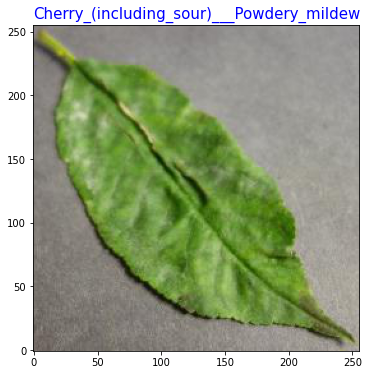

In [26]:
Random_image=np.random.choice(os.listdir("Cher/train/"))
visualize_image("Cher/train/",Random_image) 

**First train the VGG-16 architecture model with non-augmented data and check the performance**

In [27]:
#Normalize the data using ImageDataGeneator
traindata_gen=ImageDataGenerator(rescale=1/255.)
valdata_gen=ImageDataGenerator(rescale=1/255.)

In [28]:
''' 
Mapping our training and validation data to the ImageDataGenerator instance and using the function flow_from_directory
we define our taret_size,class_mode and batch_size
'''

traindata=traindata_gen.flow_from_directory("Cher/train",
                                            target_size=(256,256),
                                            class_mode="binary",
                                            batch_size=32)
validdata=valdata_gen.flow_from_directory("Cher/valid",
                                         target_size=(256,256),
                                         class_mode="binary",
                                         batch_size=32)

Found 3509 images belonging to 2 classes.
Found 877 images belonging to 2 classes.


**Step3.**


Use VGG-16 architecture to build the model

In [29]:
'''The above VGG-16 model is a pretty complex model that can genaralize 1000 classes 
but we have only 4 classes(labels) on out Apple disease data
'''

model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=(256,256,3),activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])
history=model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [30]:
#define early stopping
early_stop=EarlyStopping(monitor='val_loss',patience=3,verbose=1)

model2.fit(traindata, steps_per_epoch=len(traindata),epochs=20,
           validation_data=validdata,
           validation_steps=len(validdata),callbacks=[early_stop])

Epoch 1/20
110/110 [==============================] - 12s 102ms/step - loss: 0.2593 - accuracy: 0.8609 - val_loss: 0.0532 - val_accuracy: 0.9909
Epoch 2/20
110/110 [==============================] - 11s 99ms/step - loss: 0.0380 - accuracy: 0.9900 - val_loss: 0.0497 - val_accuracy: 0.9863
Epoch 3/20
110/110 [==============================] - 11s 101ms/step - loss: 0.0311 - accuracy: 0.9909 - val_loss: 0.0288 - val_accuracy: 0.9909
Epoch 4/20
110/110 [==============================] - 11s 100ms/step - loss: 0.0224 - accuracy: 0.9940 - val_loss: 0.0164 - val_accuracy: 0.9954
Epoch 5/20
110/110 [==============================] - 11s 99ms/step - loss: 0.0140 - accuracy: 0.9963 - val_loss: 0.0540 - val_accuracy: 0.9852
Epoch 6/20
110/110 [==============================] - 13s 120ms/step - loss: 0.0181 - accuracy: 0.9957 - val_loss: 0.0331 - val_accuracy: 0.9909
Epoch 7/20
110/110 [==============================] - 11s 100ms/step - loss: 0.0038 - accuracy: 0.9983 - val_loss: 0.0279 - val_accu

In [31]:
def plot_loss_accuracy_curves(model):
  plt.figure()
  plt.plot(model.history.history['loss'],'r')
  plt.plot(model.history.history['val_loss'],'b')
  plt.title("loss curves",fontsize=14)
  # plt.axis(False);
  plt.figure()
  plt.plot(model.history.history['accuracy'],'r')
  plt.plot(model.history.history['val_accuracy'],'b')
  plt.title("accuracy",fontsize=14)

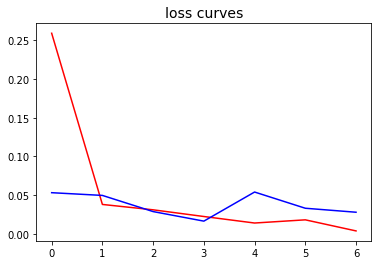

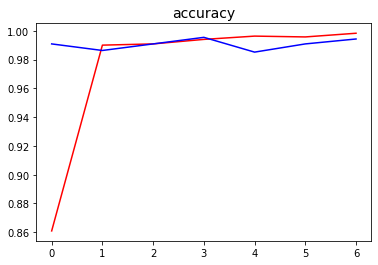

In [32]:
plot_loss_accuracy_curves(model2)

In [33]:
#Evaluate our model
model2.evaluate(validdata)

28/28 [==============================] - 2s 72ms/step - loss: 0.0279 - accuracy: 0.9943


[0.02792353369295597, 0.9942987561225891]

**Observation:**
Model2 performs well with non-augmented data.Let's try it on augmented data and check the performance

Step4. Create a model and name it model3 which'll be trained using augmented training data



In [34]:
traindata_aug_gen=ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True
                                     )

In [35]:
train_aug_data=traindata_aug_gen.flow_from_directory('Cher/train',
                                                     target_size=(256,256),
                                                     class_mode="binary",
                                                     batch_size=32)

Found 3509 images belonging to 2 classes.


In [38]:
model3=tf.keras.models.clone_model(model2)
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(train_aug_data,epochs=20,steps_per_epoch=len(train_aug_data),
           validation_data=validdata,
           validation_steps=len(validdata),callbacks=[early_stop])

Epoch 1/20
110/110 [==============================] - 51s 462ms/step - loss: 0.4756 - accuracy: 0.7478 - val_loss: 0.2257 - val_accuracy: 0.8997
Epoch 2/20
110/110 [==============================] - 52s 469ms/step - loss: 0.1317 - accuracy: 0.9481 - val_loss: 0.0988 - val_accuracy: 0.9658
Epoch 3/20
110/110 [==============================] - 52s 470ms/step - loss: 0.0725 - accuracy: 0.9724 - val_loss: 0.0131 - val_accuracy: 0.9966
Epoch 4/20
110/110 [==============================] - 50s 454ms/step - loss: 0.0335 - accuracy: 0.9909 - val_loss: 0.0059 - val_accuracy: 0.9989
Epoch 5/20
110/110 [==============================] - 50s 453ms/step - loss: 0.0184 - accuracy: 0.9946 - val_loss: 0.0057 - val_accuracy: 0.9977
Epoch 6/20
110/110 [==============================] - 51s 466ms/step - loss: 0.0121 - accuracy: 0.9954 - val_loss: 0.0325 - val_accuracy: 0.9897
Epoch 7/20
110/110 [==============================] - 50s 454ms/step - loss: 0.0123 - accuracy: 0.9952 - val_loss: 0.0733 - val_ac

In [39]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                  

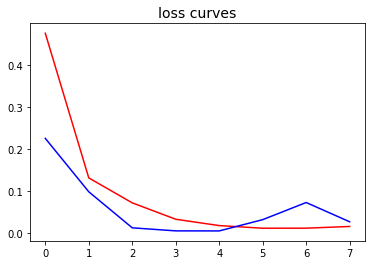

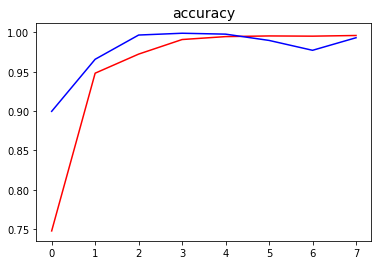

In [40]:
plot_loss_accuracy_curves(model3)

Evaluation of validation data on `model3`

In [41]:
model3.evaluate(validdata)

28/28 [==============================] - 2s 70ms/step - loss: 0.0275 - accuracy: 0.9932


[0.027474628761410713, 0.9931585192680359]

Evaluation of validation data on `model2`

In [42]:
model2.evaluate(validdata)

28/28 [==============================] - 2s 69ms/step - loss: 0.0279 - accuracy: 0.9943


[0.027923528105020523, 0.9942987561225891]

In [43]:
model2.save("model2_Cherry.h5")
model3.save("model3_Cherry.h5")

**Observation:**

As per the above observation `model3` and `model2` both  performs well on validation data.

where `model3` gave an accuracy: 99.3%

where `model2` gave an accuracy: 99.4%

Save the models and copy it to gdrive

In [45]:
shutil.copy("model2_Cherry.h5",'/gdrive/MyDrive')

'/gdrive/MyDrive/model2_Cherry.h5'

In [46]:
shutil.copy("model3_Cherry.h5",'/gdrive/MyDrive')

'/gdrive/MyDrive/model3_Cherry.h5'

In [47]:
def load_and_prep_data(path):
  img=tf.io.read_file(path)
  #decode the image into tensor
  tensor=tf.io.decode_image(img,channels=3)

  image=tf.image.resize(tensor,[256,256])
  #normalize the image
  image=image/255.

  #we need to expand the first axis beacuse of batch size
  image=tf.expand_dims(image,axis=0)
  #(1,256,256,3) 

  return image

In [48]:
class_keys=list(traindata.class_indices.keys())

In [57]:
def visualize_random_class(model):
  plt.figure(figsize=(6,5))
  class_name=np.random.choice(os.listdir("Cher/valid"))
  image_name=np.random.choice(os.listdir(os.path.join("Cher/valid",class_name)))
  img=load_and_prep_data(os.path.join("Cher/valid",class_name,image_name))
  pred=model.predict(img)
  plt.imshow(tf.squeeze(img))
  index=round(pred[0][0])
  confidence=pred[0][0]
  if(index==0):confidence=1-pred[0][0]
  color="red"
  index=int(index)
  if(class_name == class_keys[index]):color="green"
  plt.title(class_keys[index]+f"\n\n Confidence: {confidence*100:.2f}%",color=color,fontsize=13)

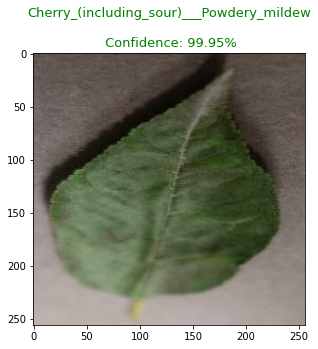

In [79]:
visualize_random_class(model2)